# Recommendation Systems Project

## Author: Abhinav Roy

### Date - 21/01/2023

In [198]:
# import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
import plotly.express as px # library for visualisations
%matplotlib inline
import missingno as msno

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.
from scipy.stats import *
from scipy.spatial.distance import cdist
from math import *

!pip install pandasql
import pandasql as psql
from pandasql import sqldf

import string
alphabet = string.ascii_letters+string.punctuation

from mpl_toolkits.mplot3d import Axes3D

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

import time
from datetime import datetime

from collections import Counter

import pickle

import warnings # ignore warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [199]:
# import machine learning algorithms
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
#from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from sklearn.metrics import *
from sklearn import model_selection
#from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV, learning_curve
from sklearn.model_selection import *
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
!pip install catboost
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# install and import SMOTE module from imblearn library
#!pip install imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTENC, SMOTE

#!pip install eli5
#import eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [200]:
# Libraries for recommendation systems
!pip install surprise
from collections import defaultdict
from surprise import SVD
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


•	DOMAIN:  Smartphone, Electronics
  
•	CONTEXT: India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system based on individual consumer’s behaviour or choice.
•	DATA DESCRIPTION:
•	author : name of the person who gave the rating
•	country : country the person who gave the rating belongs to
•	data : date of the rating
•	domain: website from which the rating was taken from
•	extract: rating content
•	language: language in which the rating was given
•	product: name of the product/mobile phone for which the rating was given
•	score: average rating for the phone
•	score_max: highest rating given for the phone
•	source: source from where the rating was taken
•	PROJECT OBJECTIVE: We will build a recommendation system using popularity based and collaborative filtering methods to recommend mobile phones to a user which are most popular and personalised respectively.
Steps and tasks: [ Total Score: 60 points]
1.	Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps. [15 Marks]
A.	Merge all the provided CSVs into one dataFrame. [2 Marks]
B.	Explore, understand the Data and share at least 2 observations. [2 Marks]
C.	Round off scores to the nearest integers. [3 Marks]
D.	Check for missing values. Impute the missing values, if any. [2 Marks]
E.	Check for duplicate values and remove them, if any. [2 Marks]
F.	Keep only 1 Million data samples. Use random state=612. [2 Marks]
G.	Drop irrelevant features. Keep features like Author, Product, and Score. [2 Marks]
2.	Answer the following questions. [10 Marks]
A.	Identify the most rated products. [3 Marks]
B.	Identify the users with most number of reviews. [3 Marks]
C.	Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset. [4 Marks]
3.	Build a popularity based model and recommend top 5 mobile phones. [5 Marks]
4.	Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch you can limit your data points to 5000 samples if you face memory issues). Build a collaborative filtering model using kNNWithMeans from surprise. You can try both user-based and item-based model. [10 Marks]
5.	Evaluate the collaborative model. Print RMSE value. [2 Marks]
6.	Predict score (average rating) for test users. [2 Marks]
7.	Report your findings and inferences. [2 Marks]
8.	Try and recommend top 5 products for test users. [5 Marks]
9.	Try other techniques (Example: cross validation) to get better results. [3 Marks]
10.	In what business scenario you should use popularity based Recommendation Systems ? [2 Marks]
11.	In what business scenario you should use CF based Recommendation Systems ? [2 Marks]
12.	What other possible methods can you think of which can further improve the recommendation for different users ? [2 Marks]


## 1.	Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps. 

In [201]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [202]:
df_review_1 = pd.read_csv('/content/drive/MyDrive/Great_Learning/00/04_GL_Projects/06_Recommender_Systems/Data Set/phone_user_review_file_1.csv', encoding='iso-8859-1')

In [203]:
df_review_1.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [204]:
df_review_2 = pd.read_csv('/content/drive/MyDrive/Great_Learning/00/04_GL_Projects/06_Recommender_Systems/Data Set/phone_user_review_file_2.csv', encoding='iso-8859-1')
df_review_3 = pd.read_csv('/content/drive/MyDrive/Great_Learning/00/04_GL_Projects/06_Recommender_Systems/Data Set/phone_user_review_file_3.csv', encoding='iso-8859-1')
df_review_4 = pd.read_csv('/content/drive/MyDrive/Great_Learning/00/04_GL_Projects/06_Recommender_Systems/Data Set/phone_user_review_file_4.csv', encoding='iso-8859-1')
df_review_5 = pd.read_csv('/content/drive/MyDrive/Great_Learning/00/04_GL_Projects/06_Recommender_Systems/Data Set/phone_user_review_file_5.csv', encoding='iso-8859-1')
df_review_6 = pd.read_csv('/content/drive/MyDrive/Great_Learning/00/04_GL_Projects/06_Recommender_Systems/Data Set/phone_user_review_file_6.csv', encoding='iso-8859-1')

In [205]:
print('Check if the column names match in all dataframes: ')
print('*' * 50)
all(np.unique(df_review_1.columns.tolist()) == np.unique(df_review_1.columns.tolist()+
                                                      df_review_2.columns.tolist()+
                                                      df_review_3.columns.tolist()+
                                                      df_review_4.columns.tolist()+
                                                      df_review_5.columns.tolist()+
                                                      df_review_6.columns.tolist()))

Check if the column names match in all dataframes: 
**************************************************


True

In [206]:
# A.	Merge all the provided CSVs into one dataFrame.
df = pd.concat([df_review_1, df_review_2, df_review_3, df_review_4, df_review_5, df_review_6], ignore_index = True)
print('Top 5 rows of the data: ')
print('*' * 50)
display(df.head())

Top 5 rows of the data: 
**************************************************


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [207]:
# dataframe df shape
print(f'Dataframe shape: Rows: {df.shape[0]} and Columns: {df.shape[1]}\n')

Dataframe shape: Rows: 1415133 and Columns: 11



In [208]:
# dataframe 5-point summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,1351644.0,8.00706,2.616121,0.2,7.2,9.2,10.0,10.0
score_max,1351644.0,10.00000,0.000000,10.0,10.0,10.0,10.0,10.0


In [209]:
# Check the unique values for the Numerical features in the dataframe
num_cols = df.select_dtypes(exclude = 'object').columns.to_list()
df[num_cols] = df[num_cols].astype('float')
df[num_cols].nunique().to_frame()

,0
score,86
score_max,1


In [210]:
# Check the most frequent values for the categorical features in the dataframe
cat_cols = df.select_dtypes(include = 'object').columns.to_list()
df.apply(lambda cat_cols: cat_cols.value_counts().index[0]).to_frame()

,0
phone_url,/cellphones/samsung-galaxy-s-iii/
date,7/18/2016
lang,en
country,us
source,Amazon
domain,amazon.com
score,10.0
score_max,10.0
extract,#NAME?
author,Amazon Customer


In [211]:
# B.	Explore, understand the Data and share at least 2 observations. 
# dataframe df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415133 entries, 0 to 1415132
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 118.8+ MB


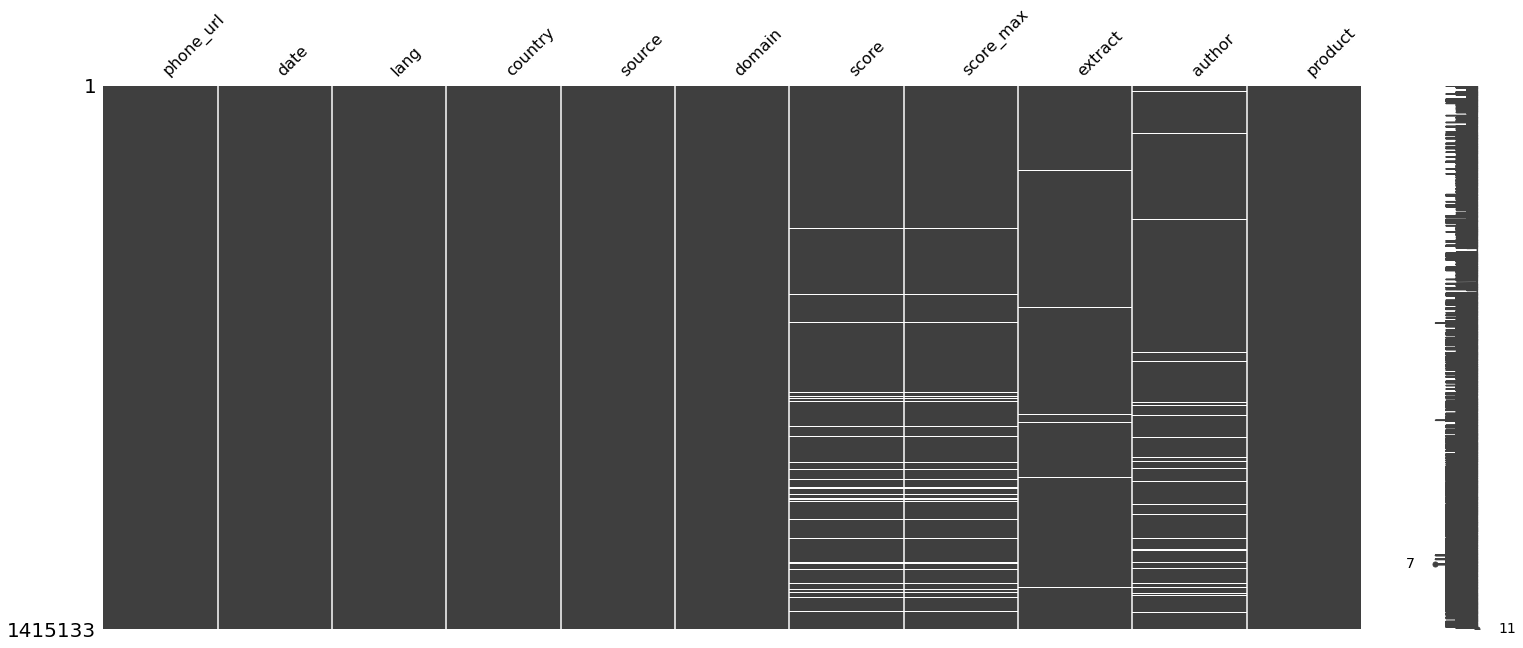

In [212]:
# Visualising Nulls in the dataframe
msno.matrix(df);

##### B.	Explore, understand the Data and share at least 2 observations. 

#### Observations:

1) Except score and score_max (which are of Float type) all other features are of Object type.

2) Feature date should be Date type.

3) Features score, score_max, extract and author seem to have Null values.

In [213]:
# create dataframe copy
df1 = df.copy(deep = True)
df1.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [214]:
# Convert feature date to Date data type
#df1.date.apply(pd.to_datetime)

In [215]:
# C.	Round off scores to the nearest integers
def num_cols_round(df):

    num_cols = df.select_dtypes(exclude = 'object').columns.to_list()
    df[num_cols] = df[num_cols].astype('float')

    for i in num_cols:
      print('Number of Unique values in dataframe feature {}: {}'.format(i, df[i].nunique()))
      #print('*' * 50)

      df[i] = df[i].round(0).astype('Int64')

      print('Number of Unique values in dataframe feature {} after rounding off to nearest integer: {}'.format(i, df[i].nunique()))
      print('*' * 50)


In [216]:
num_cols_round(df1)

Number of Unique values in dataframe feature score: 86
Number of Unique values in dataframe feature score after rounding off to nearest integer: 11
**************************************************
Number of Unique values in dataframe feature score_max: 1
Number of Unique values in dataframe feature score_max after rounding off to nearest integer: 1
**************************************************


In [217]:
# check for missing values in dataframe df 
df1.isna().sum().to_frame()

,0
phone_url,0
date,0
lang,0
country,0
source,0
domain,0
score,63489
score_max,63489
extract,19361
author,63202


In [218]:
# Print feature-wise percentage of missing values present in the data and impute with the best suitable approach
percent_missing = (df1.isna().sum()/ len(df1)) * 100
percent_missing.to_frame()

,0
phone_url,0.000000
date,0.000000
lang,0.000000
country,0.000000
source,0.000000
domain,0.000000
score,4.486433
score_max,4.486433
extract,1.368140
author,4.466153


In [219]:
# D.	Check for missing values. Impute the missing values, if any. 
# Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature. 
def remove_nulls(df):
    print('Dataframe shape before removing Nulls:', df.shape)
    print('*' * 50)
   
    filter_cols = df.columns[df.isna().mean() > 0.2]
    print('Number of features with 20%+ Null values:', filter_cols.shape[0])
    print('*' * 50)

    # Drop features with 20%+ Null values
    for i in filter_cols:
        df.drop(i, axis = 1, inplace = True)
        
    num_cols = df.select_dtypes(exclude = 'object').columns.to_list()
    df[num_cols] = df[num_cols].astype('float')
    
    # Impute features with < 20%+ Null values with mean of the feature
    df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
     
    # Drop dataframe rows with Null values
    cat_cols = df.select_dtypes(include = 'object').columns.to_list() 
    for i in cat_cols:
      df.dropna(axis = 0, inplace = True)
    
    print('Dataframe shape after removing Nulls:', df.shape)
    print('*' * 50)
    print('Dataframe 5-point summary:')
    return df.describe().T

    #cat_cols = df.select_dtypes(include = 'object').columns.to_list()
    #df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode())
    #df.apply(lambda cat_cols: cat_cols.fillna(cat_cols.value_counts().index[0]))



In [220]:
remove_nulls(df1)

Dataframe shape before removing Nulls: (1415133, 11)
**************************************************
Number of features with 20%+ Null values: 0
**************************************************
Dataframe shape after removing Nulls: (1336416, 11)
**************************************************
Dataframe 5-point summary:


,count,mean,std,min,25%,50%,75%,max
score,1336416.0,8.00948,2.562688,0.0,8.0,9.0,10.0,10.0
score_max,1336416.0,10.00000,0.000000,10.0,10.0,10.0,10.0,10.0


In [221]:
# Print feature-wise percentage of missing values present in the data and impute with the best suitable approach
percent_missing = (df1.isna().sum()/ len(df1)) * 100
percent_missing.to_frame()

,0
phone_url,0.0
date,0.0
lang,0.0
country,0.0
source,0.0
domain,0.0
score,0.0
score_max,0.0
extract,0.0
author,0.0


In [222]:
# E.	Check for duplicate values and remove them, if any
def remove_duplicates(df):

  if df.duplicated().any() == True:
    print('Number of Duplicates rows in the dataframe: {}'.format(df.duplicated().sum()))
    
    # Drop duplicate rows
    df.drop_duplicates(keep = 'first', inplace = True)
    
    print('Number of Duplicates in the dataframe after dropping rows: {}'.format(df.duplicated().sum()))
  else:
    print('There are no Duplicate rows in the dataframe')

In [223]:
remove_duplicates(df1)

Number of Duplicates rows in the dataframe: 4823
Number of Duplicates in the dataframe after dropping rows: 0


## Data Visualization

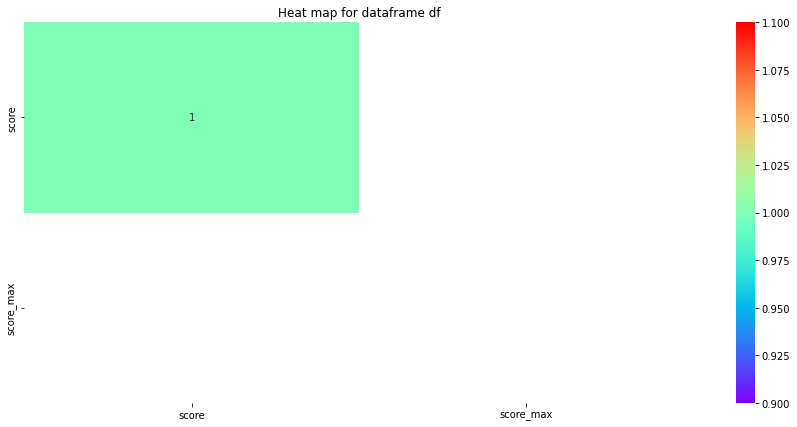

In [224]:
# Plotting the heat map for dataframe df
plt.figure(figsize = (15,7))
plt.title('Heat map for dataframe df1')
sns.heatmap(df1.corr(), annot = True, cmap = 'rainbow');

In [225]:
# Function that will accept a DataFrame as input and return Histogram & Boxplot for all the appropriate Numerical features
def num_var_distn(df, fig_size_x = 15, fig_size_y = 3):
    
    num_cols = df.select_dtypes(exclude = 'object').columns.to_list()

    for i in num_cols:
        fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (fig_size_x, fig_size_y))
        plt.suptitle("Histogram & Boxplot for {} feature".format(i), ha = 'center')
        sns.histplot(data = df, x = i, ax = ax[0], fill = True, kde = True, color = 'Green')
        sns.boxplot(data = df, x = i, ax = ax[1], color = 'Orange')
        #ax.invert_yaxis()
        #checking count of outliers
        q25, q75 = np.percentile(df[i], 25), np.percentile(df[i], 75)
        IQR = q75 - q25
        Threshold = IQR * 1.5
        lower, upper = q25 - Threshold, q75 + Threshold
        Outliers = [i for i in df[i] if i < lower or i > upper]
        print('{} Total Number of outliers in {}: {}'.format('\033[1m',i,len(Outliers)))

 Total Number of outliers in score: 196180
 Total Number of outliers in score_max: 0


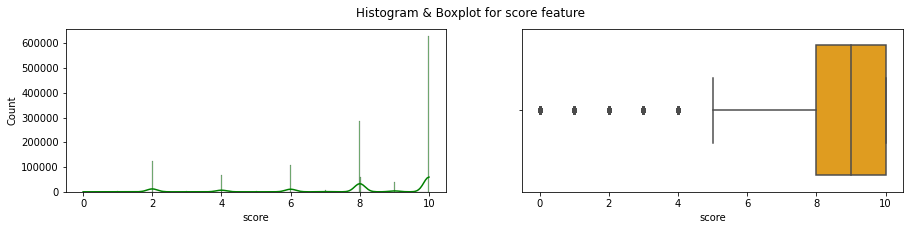

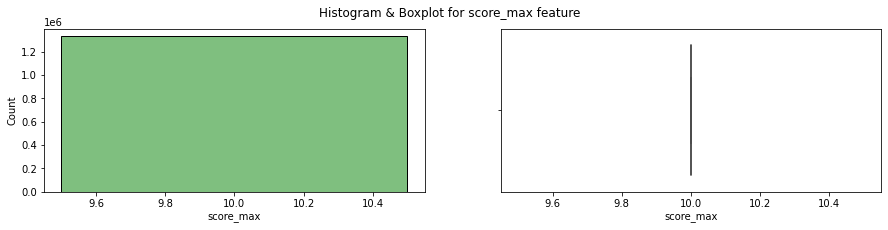

In [226]:
# Calling the function to plot Histogram & Boxplot for all Numerical features
num_var_distn(df1)

In [227]:
# F.	Keep only 1 Million data samples. Use random state=612
random_state = 612
# create dataframe copy
df2 = df1.sample(n = 1000000, random_state = random_state)
df2.shape

(1000000, 11)

In [229]:
# G.	Drop irrelevant features. Keep features like Author, Product, and Score
df2 = df2[['author', 'product', 'score']]
df2.head()

,author,product,score
8765,Kdotj15,Samsung Galaxy S7 edge 32GB (Sprint),10.0
233365,Cliente Amazon,Asus ZE551ML-2A760WW Smartphone ZenFone 2 Delu...,10.0
145859,ron,×××¤×× ×¡××××¨× Huawei Mate S 32GB,10.0
1203260,katha_maria93,Sony Ericsson W395 blush titanium Handy,8.0
1205666,paul george,Apple iPhone 3G 8GB SIM-Free - Black,2.0


## 2.	Answer the following questions. 

Distribution of number of ratings per item (Clipped at 10): 
 Lenovo Vibe K4 Note (White,16GB)                3913
Lenovo Vibe K4 Note (Black, 16GB)               3228
OnePlus 3 (Graphite, 64 GB)                     3127
OnePlus 3 (Soft Gold, 64 GB)                    2643
Huawei P8lite zwart / 16 GB                     1994
Samsung Galaxy Express I8730                    1982
Lenovo Vibe K5 (Gold, VoLTE update)             1865
Samsung Galaxy S6 zwart / 32 GB                 1729
Lenovo Vibe K5 (Grey, VoLTE update)             1596
Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB)    1453
Name: product, dtype: int64


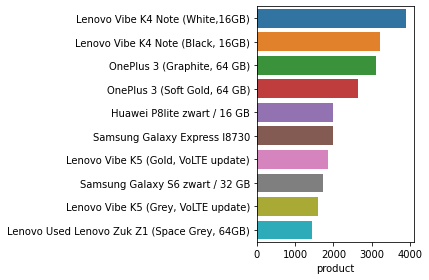

In [230]:
# A.	Identify the most rated products.
product = df2['product'].value_counts(dropna = False)[:10]
print('Distribution of number of ratings per item (Clipped at 10): \n',product)
sns.barplot(y = product.index, x = product)
plt.tight_layout()
plt.show();

#### Observations:

1) The most rated products are the Lenevo K4 Note 16 GB color variants followed by OnePlus 3 64 GB color variants and Huawei P8lite zwart.

Distribution of number of ratings per user(Clipped at 10): 
 Amazon Customer    57801
Cliente Amazon     14656
e-bit               6260
Client d'Amazon     5715
Amazon Kunde        3563
Anonymous           1968
einer Kundin        1953
einem Kunden        1432
unknown             1283
Anonymous           1096
Name: author, dtype: int64


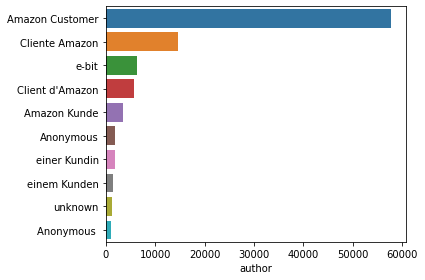

In [231]:
# B.	Identify the users with most number of reviews. 
users = df2['author'].value_counts(dropna = False)[:10]
print('Distribution of number of ratings per user(Clipped at 10): \n', users)
users.index = users.index.map(str)
sns.barplot(y = users.index, x = users)
plt.tight_layout()
plt.show();

#### Observations:

1) Many author names are similar but in different languages like 'Amazon customer' and 'Cliente Amazon'. Let's search for these first and clean up the differences due to language.

2) 'Anonymous' and 'unknown' users are those whose names are not known. Thus we can use this to impute blank values in 'author' column. names like 'einer Kundin', 'einem Kunden','Anonymous' and 'unknown' can be interpreted in the same way i.e. an 'unknown customer'. Let's replace these names too.

In [232]:
# check for rows containing 'Amazon'
#psql.sqldf("select author, count(author) as author_count from df2 where author like '%Amazon%' order by author_count desc")
amazon_list = psql.sqldf("select distinct author from df2 where author like '%Amazon%' limit 10")
amazon_list.head()

,author
0,Cliente Amazon
1,Amazon Customer
2,Client d'Amazon
3,Amazon Kunde
4,AmazonKunde


In [233]:
amazon_list = amazon_list.values.tolist()
df2['author'].replace(to_replace = amazon_list, value = 'Amazon', inplace = True)

In [234]:
unknowns = ['Anonymous','einer Kundin','einem Kunden', 'unknown','Anonymous ']
df2['author'].replace(to_replace = unknowns, value = 'Unknown', inplace = True)

Distribution of number of ratings per user(Clipped at 10): 
 Amazon                82246
Unknown                7750
e-bit                  6260
David                   751
ÐÐ»ÐµÐºÑÐ°Ð½Ð´Ñ      746
Alex                    655
Ð¡ÐµÑÐ³ÐµÐ¹            653
Marco                   646
Andrea                  623
ÐÐ¼Ð¸ÑÑÐ¸Ð¹          611
Name: author, dtype: int64


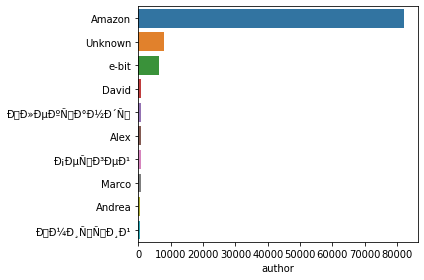

In [235]:
users = df2['author'].value_counts(dropna = False)[:10]
print('Distribution of number of ratings per user(Clipped at 10): \n',users)
users.index = users.index.map(str)
sns.barplot(y = users.index, x = users)
plt.tight_layout()
plt.show();

#### Observations:

1) The most active user with reviews is 'Amazon' followed by 'Unknown' and 'e-bit'.

In [236]:
# C.	Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset
author50 = df2['author'].value_counts()
author50 = author50[author50 > 50].index.tolist() # list of authors with > 50 ratings
print('Number of authors who have given >50 ratings: ', len(author50))

product50 = df2['product'].value_counts()
product50 = product50[product50 > 50].index.tolist() # list of products with > 50 ratings
print('Number of products with >50 rating: ', len(product50))

print('Dataframe with products having more than 50 ratings and users who have given more than 50 ratings')
print('*' * 50)
df2 = df2[(df2['author'].isin(author50)) & (df2['product'].isin(product50))]
print(f'Dataframe Rows: {df2.shape[0]} and Columns: {df2.shape[1]}\n')

df2.head()

Number of authors who have given >50 ratings:  681
Number of products with >50 rating:  4376
Dataframe with products having more than 50 ratings and users who have given more than 50 ratings
**************************************************
Dataframe Rows: 109263 and Columns: 3



,author,product,score
233365,Amazon,Asus ZE551ML-2A760WW Smartphone ZenFone 2 Delu...,10.0
537487,Amazon,"Apple iPhone 5s (Silver, 16GB)",2.0
518771,Unknown,"ZTE Blade A452 Smartphone, 12,7 cm (5 Zoll) Di...",10.0
353663,Amazon,Aukru Chargeur de batterie adaptateur Pour Sam...,8.0
224123,Amazon,"Motorola Moto G 3rd Generation (Black, 16GB)",8.0


## 3.	Build a popularity based model and recommend top 5 mobile phones

In [237]:
def popularity_rec(data):
    %time
    print('*' * 50)
    ratings_mean_count = pd.DataFrame(data.groupby('product')['score'].mean())
    ratings_mean_count['rating_counts'] = data.groupby('product')['score'].count()
    ratings_mean_count = ratings_mean_count.sort_values(by = ['score','rating_counts'], ascending = [False,False])
    print('Top 5 recommendations for the products are: \n')
    display(ratings_mean_count.head())
    return

In [238]:
# Using the data from the most popular phones amongst the most frequent users
popularity_rec(df2)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.82 µs
**************************************************
Top 5 recommendations for the products are: 



,score,rating_counts
product,,
Samsung Galaxy Note5,10.0,56
Samsung Galaxy S7 Edge 32Gb,10.0,13
Sim Free Apple iPhone SE 64GB Mobile Phone - Space Grey,10.0,12
Sony Smartphone Sony Xperia L Preto Android 4.1 3G CÃ¢mera 8MP 8GB NFC,10.0,12
BlackBerry OEM Z10 Black Leather Swivel Holster,10.0,9


In [239]:
# popularity based model and recommend top 5 mobile phones from the processed dataframe with all features and rows
popularity_rec(df1)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs
**************************************************
Top 5 recommendations for the products are: 



,score,rating_counts
product,,
Samsung Galaxy Note5,10.0,200
Motorola Smartphone Motorola Moto X Desbloqueado Preto Android 4.2.2 CÃ¢mera 10MP e Frontal 2MP MemÃ³ria Interna de 16GB GSM,10.0,186
Motorola Smartphone Motorola Moto G Dual Chip Desbloqueado TIM Android 4.3 Tela 4.5 8GB 3G Wi-Fi CÃ¢mera 5MP - Preto,10.0,173
Samsung Smartphone Dual Chip Samsung Galaxy SIII Duos Desbloqueado Claro Azul Android 4.1 3G/Wi-Fi CÃ¢mera 5MP,10.0,171
Nokia Smartphone Nokia Lumia 520 Desbloqueado Oi Preto Windows Phone 8 CÃ¢mera 5MP 3G Wi-Fi MemÃ³ria Interna 8G GPS,10.0,170


In [240]:
# popularity based model and recommend top 5 mobile phones from the original dataframe
popularity_rec(df)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.3 µs
**************************************************
Top 5 recommendations for the products are: 



,score,rating_counts
product,,
Samsung Galaxy Note5,10.0,200
Motorola Smartphone Motorola Moto X Desbloqueado Preto Android 4.2.2 CÃ¢mera 10MP e Frontal 2MP MemÃ³ria Interna de 16GB GSM,10.0,186
Motorola Smartphone Motorola Moto G Dual Chip Desbloqueado TIM Android 4.3 Tela 4.5 8GB 3G Wi-Fi CÃ¢mera 5MP - Preto,10.0,173
Samsung Smartphone Dual Chip Samsung Galaxy SIII Duos Desbloqueado Claro Azul Android 4.1 3G/Wi-Fi CÃ¢mera 5MP,10.0,171
Nokia Smartphone Nokia Lumia 520 Desbloqueado Oi Preto Windows Phone 8 CÃ¢mera 5MP 3G Wi-Fi MemÃ³ria Interna 8G GPS,10.0,170


## 4.	Build a collaborative filtering model.

1) Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch you can limit your data points to 5000 samples if you face memory issues). 

2) Build a collaborative filtering model using kNNWithMeans from surprise. You can try both user-based and item-based model. 

In [241]:
# Rearrange columns for SVD and prepare train and testsets
df3 = Dataset.load_from_df(df2.iloc[:50001,:], Reader(rating_scale = (1, 10))) # taking 5000 dataframe samples to compensate for compute

trainset, testset = train_test_split(df3, test_size = 0.25, random_state = random_state)

In [242]:
print('Top 3 values in train set: \n')
for key, value in {k: v for k, v in trainset.ur.items() if k <= 2}.items(): print(key,'--> ', value,'\n')

Top 3 values in train set: 

0 -->  [(0, 8.0), (2, 8.0), (3, 2.0), (4, 10.0), (7, 8.0), (8, 8.0), (9, 10.0), (18, 10.0), (19, 4.0), (20, 10.0), (21, 2.0), (23, 2.0), (24, 10.0), (26, 8.0), (27, 10.0), (28, 10.0), (31, 8.0), (32, 2.0), (33, 6.0), (39, 2.0), (40, 2.0), (39, 10.0), (42, 6.0), (43, 10.0), (45, 10.0), (46, 8.0), (48, 10.0), (49, 10.0), (51, 8.0), (53, 6.0), (57, 6.0), (58, 10.0), (39, 8.0), (59, 2.0), (60, 10.0), (61, 10.0), (9, 10.0), (40, 2.0), (69, 10.0), (70, 6.0), (71, 10.0), (39, 8.0), (73, 2.0), (74, 10.0), (49, 2.0), (77, 10.0), (49, 10.0), (81, 10.0), (9, 10.0), (82, 2.0), (83, 10.0), (23, 10.0), (18, 10.0), (84, 6.0), (86, 2.0), (88, 10.0), (89, 2.0), (27, 2.0), (95, 10.0), (28, 10.0), (98, 2.0), (26, 2.0), (100, 10.0), (102, 6.0), (23, 2.0), (9, 10.0), (104, 10.0), (107, 10.0), (108, 10.0), (86, 6.0), (110, 8.0), (18, 2.0), (113, 10.0), (114, 8.0), (39, 2.0), (115, 2.0), (118, 10.0), (19, 10.0), (83, 4.0), (120, 8.0), (124, 10.0), (129, 8.0), (134, 8.0), (135, 10

In [243]:
print('\nTop 3 values in test set: ', *testset[0:3], sep='\n\n')


Top 3 values in test set: 

('AnÃ´nimo', 'Samsung Smartphone Samsung Galaxy Win Duos Dual Chip Desbloqueado Android 4.1...', 10.0)

('Amazon', 'Apple iPhone 6 64GB Grigio [Italia]', 10.0)

('Amazon', 'Mi Xiaomi Mi Max (Gold, 32GB)', 10.0)


In [244]:
# 4.	Build a collaborative filtering model using SVD
# fit and predict using svd
def svd_colab(train, test):
    %time
    print('*' * 50)

    svd = SVD(random_state = random_state)
    svd.fit(train)
    svd_pred = svd.test(test)
    return svd_pred, svd

In [245]:
# Call the function
svd_pred, svd = svd_colab(trainset, testset)

print('First 3 prediction values: \n', svd_pred[0:3])

svd_rmse  = round(accuracy.rmse(svd_pred), 2) # compute RMSE

print('\n The RMSE value for test-set is: ', svd_rmse, '\n')

CPU times: user 0 ns, sys: 4 µs, total: 4 µs
Wall time: 9.06 µs
**************************************************
First 3 prediction values: 
 [Prediction(uid='AnÃ´nimo', iid='Samsung Smartphone Samsung Galaxy Win Duos Dual Chip Desbloqueado Android 4.1...', r_ui=10.0, est=8.635808445869026, details={'was_impossible': False}), Prediction(uid='Amazon', iid='Apple iPhone 6 64GB Grigio [Italia]', r_ui=10.0, est=7.712108189638857, details={'was_impossible': False}), Prediction(uid='Amazon', iid='Mi Xiaomi Mi Max (Gold, 32GB)', r_ui=10.0, est=6.720557827878997, details={'was_impossible': False})]
RMSE: 2.7033

 The RMSE value for test-set is:  2.7 



In [246]:
# 6.	Predict score (average rating) for test users. 
print('Collaborative filtering model Score (average rating) for test users: SVD')
print('*' * 50)

svd_pred_df = pd.DataFrame(svd_pred, columns = ['uid', 'iid', 'rui', 'est', 'details'])
print('average prediction for test users: ', svd_pred_df['est'].mean())
print('average rating  by test users: ', svd_pred_df['rui'].mean())
print('average prediction error for test users: ', (svd_pred_df['rui'] - svd_pred_df['est']).abs().mean())

Collaborative filtering model Score (average rating) for test users: SVD
**************************************************
average prediction for test users:  7.831204352131515
average rating  by test users:  7.800699377734982
average prediction error for test users:  2.083151953202423


In [247]:
# 9.	Try other techniques (Example: cross validation) to get better results. 
%time
svd_cv = cross_validate(svd, df3, measures=['RMSE'], cv = 5, verbose = False)
print('\n Mean svd cv score:', round(svd_cv['test_rmse'].mean(), 2), '\n')
svd_cv

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs

 Mean svd cv score: 2.69 



{'test_rmse': array([2.73547937, 2.68759246, 2.64342779, 2.6877177 , 2.70234304]),
 'fit_time': (0.6945438385009766,
  0.7712812423706055,
  0.684370756149292,
  0.7387654781341553,
  0.7095909118652344),
 'test_time': (0.07689166069030762,
  0.06937885284423828,
  0.07654452323913574,
  0.07449197769165039,
  0.06884026527404785)}

In [248]:
# Build a collaborative filtering model using kNNWithMeans from surprise. You can try both user-based and item-based model.

# fit and predict using knn
def knn_colab(train, test, k, user_based = True):
    %time
    print('*' * 50)

    knn = KNNWithMeans(k = k, sim_options={'name': 'pearson_baseline', 'user_based': user_based})
    knn.fit(train)
    knn_pred = knn.test(test)
    return knn_pred, knn, k, user_based

In [249]:
# user-based collaborative filtering model using kNNWithMeans
# Call the function
knn_pred, knn, k, user_based = knn_colab(trainset, testset, 50, True) # k = 50 nearest neighbors

print('First three prediction values: \n', knn_pred[0:3])

knn_rmse_u = round(accuracy.rmse(knn_pred), 2) # compute RMSE

print('\n The RMSE value for test-set(User-based Model) is: ', knn_rmse_u,'\n') # compute RMSE

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
**************************************************
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
First three prediction values: 
 [Prediction(uid='AnÃ´nimo', iid='Samsung Smartphone Samsung Galaxy Win Duos Dual Chip Desbloqueado Android 4.1...', r_ui=10.0, est=7.816050484417493, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}), Prediction(uid='Amazon', iid='Apple iPhone 6 64GB Grigio [Italia]', r_ui=10.0, est=7.600566387071043, details={'actual_k': 6, 'was_impossible': False}), Prediction(uid='Amazon', iid='Mi Xiaomi Mi Max (Gold, 32GB)', r_ui=10.0, est=8.479999999999999, details={'actual_k': 50, 'was_impossible': False})]
RMSE: 2.7897

 The RMSE value for test-set(User-based Model) is:  2.79 



In [250]:
# 6.	Predict score (average rating) for test users. 
print('Collaborative filtering model Score (average rating) for test users: User-based')
print('*' * 50)

knn_u_pred_df = pd.DataFrame(knn_pred, columns = ['uid', 'iid', 'rui', 'est', 'details'])
print('average prediction for test users: ', knn_u_pred_df['est'].mean())
print('average rating  by test users: ', knn_u_pred_df['rui'].mean())
print('average prediction error for test users: ', (knn_u_pred_df['rui'] - knn_u_pred_df['est']).abs().mean())

Collaborative filtering model Score (average rating) for test users: User-based
**************************************************
average prediction for test users:  7.789692497342736
average rating  by test users:  7.800699377734982
average prediction error for test users:  2.1100150503409765


In [253]:
# 9.	Try other techniques (Example: cross validation) to get better results. 
%time
knn_u_cv = cross_validate(knn, df3, measures=['RMSE'], cv = 5, verbose = False)
print('\n Mean knn_user cv score:', round(knn_u_cv['test_rmse'].mean(), 2), '\n')
knn_u_cv

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10.5 µs
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.

 Mean svd cv score: 2.8 



{'test_rmse': array([2.80763096, 2.79688274, 2.84845949, 2.78297289, 2.77474122]),
 'fit_time': (0.555152416229248,
  0.24430298805236816,
  0.2685270309448242,
  0.256000280380249,
  0.27784228324890137),
 'test_time': (2.1755423545837402,
  0.9842123985290527,
  1.0069737434387207,
  0.9808595180511475,
  0.9861254692077637)}

In [254]:
# item-based collaborative filtering model using kNNWithMeans
# Call the function
knn_pred, knn, k, user_based = knn_colab(trainset, testset, 10, False) # k = 10 nearest neighbors(for compute)

print('First three prediction values: \n', knn_pred[0:3])

knn_rmse_i = round(accuracy.rmse(knn_pred), 2) # compute RMSE

print('\n The RMSE value for test-set(Item-based Model) is: ', knn_rmse_i,'\n') # compute RMSE

CPU times: user 11 µs, sys: 1 µs, total: 12 µs
Wall time: 14.5 µs
**************************************************
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
First three prediction values: 
 [Prediction(uid='AnÃ´nimo', iid='Samsung Smartphone Samsung Galaxy Win Duos Dual Chip Desbloqueado Android 4.1...', r_ui=10.0, est=7.816050484417493, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}), Prediction(uid='Amazon', iid='Apple iPhone 6 64GB Grigio [Italia]', r_ui=10.0, est=7.603627195557545, details={'actual_k': 10, 'was_impossible': False}), Prediction(uid='Amazon', iid='Mi Xiaomi Mi Max (Gold, 32GB)', r_ui=10.0, est=7.8, details={'actual_k': 10, 'was_impossible': False})]
RMSE: 2.8502

 The RMSE value for test-set(Item-based Model) is:  2.85 



In [255]:
# 6.	Predict score (average rating) for test users. 
print('Collaborative filtering model Score (average rating) for test users: Item-based')
print('*' * 50)

knn_i_pred_df = pd.DataFrame(knn_pred, columns = ['uid', 'iid', 'rui', 'est', 'details'])
print('average prediction for test users: ', knn_i_pred_df['est'].mean())
print('average rating  by test users: ', knn_i_pred_df['rui'].mean())
print('average prediction error for test users: ', (knn_i_pred_df['rui'] - knn_i_pred_df['est']).abs().mean())

Collaborative filtering model Score (average rating) for test users: Item-based
**************************************************
average prediction for test users:  7.784903453477943
average rating  by test users:  7.800699377734982
average prediction error for test users:  2.1491371973055156


In [257]:
# 9.	Try other techniques (Example: cross validation) to get better results. 
%time
knn_i_cv = cross_validate(knn, df3, measures=['RMSE'], cv = 5, verbose = False)
print('\n Mean knn_item cv score:', round(knn_i_cv['test_rmse'].mean(), 2), '\n')
knn_i_cv

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.

 Mean knn_item cv score: 2.82 



{'test_rmse': array([2.8436988 , 2.84925609, 2.80754292, 2.80153048, 2.79981324]),
 'fit_time': (22.144284963607788,
  21.576234817504883,
  21.886408805847168,
  21.2316472530365,
  22.978500366210938),
 'test_time': (100.52304744720459,
  110.54284691810608,
  101.12760210037231,
  100.77794003486633,
  94.79412055015564)}

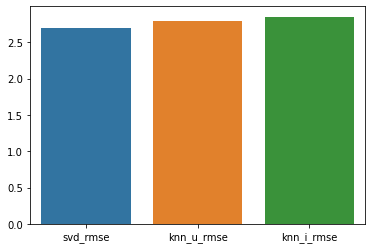

In [258]:
# 5.	Evaluate the collaborative model. Print RMSE value. 
sns.barplot(x = ['svd_rmse','knn_u_rmse', 'knn_i_rmse'], y = [svd_rmse, knn_rmse_u, knn_rmse_i]);

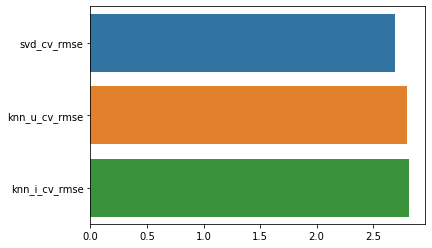

In [259]:
# Comparison of RMSE scores(mean cv) from different collaorative algorithms
sns.barplot(y = ['svd_cv_rmse', 'knn_u_cv_rmse', 'knn_i_cv_rmse'],
            x = [svd_cv['test_rmse'].mean(), knn_u_cv['test_rmse'].mean(),  knn_i_cv['test_rmse'].mean()]);

#### 7.	Report your findings and inferences. 

#### Observations:

1) The most rated mobile phone is Samsung Galaxy Note5.

2) Overall data is highly skewed towards 'Amazon customers' from different countries. This may also be because 'Amazon' is the biggest trader for phones in the world. Although correct 'user' names from 'Amazon' should have used.

3) Most of the authors have given the rating of '10' or '8'.

4) Both knn_i(item-based) and knn_u(user-based) have roughly similar RMSE.

In [192]:
# Get top_n recommendation for each user
def get_top_n(predictions, n = 5):
    %time
    print('*' * 50)
    
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the n highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [260]:
# 8.	Try and recommend top 5 products for test users. 
%time
#recommend top 5 products for test users
top_5 = get_top_n(knn_pred, 5)
print('Top 5 recommendations for all test users are: \n')
for key, value in top_5.items(): print(key,'-> ', value,'\n') # to print all the recommendations for all the users
#print('Top 5 recommendations for 3 users are: \n')
#for key,value in {k: v for k, v in top_5.items() if k in ['Amazon Customer','Cliente Amazon',"Client d'Amazon"]}.items(): print(key,'-> ',value,'\n')

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 14.8 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs
**************************************************
Top 5 recommendations for all test users are: 

AnÃ´nimo ->  [('Sony Smartphone Sony Xperia L Preto Android 4.1 3G CÃ¢mera 8MP 8GB NFC', 10), ('Sony Smartphone Sony Xperia L Preto Android 4.1 3G CÃ¢mera 8MP 8GB NFC', 10), ('Samsung Smartphone Samsung Galaxy S4 Mini Duos Dual Chip Desbloqueado Android...', 10), ('Samsung Galaxy S III Mini Desbloqueado Vivo Metallic Blue Android Tela 4 CÃ¢mera 5MP 3G Wi-Fi MemÃ³ria Interna 8GB', 10), ('Samsung Smartphone Samsung Galaxy S4 Mini Duos Dual Chip Desbloqueado Android...', 10)] 

Amazon ->  [('Microsoft Nokia Lumia 820 Smartphone (10,9 cm (4,3 Zoll) Touchscreen, Snapdragon S4, Dual-Core, 1,5GHz, 1GB RAM, 8 Megapixel Kamera, Win 8) gl??nzend gelb', 10), ('Asus ZenFone 5 Smartphone, 8 GB, RAM 2 GB, Nero [Italia]', 10), ('Samsung I9060i Galaxy Grand Neo Plus Smartphone, 

#### 10.	In what business scenario you should use popularity based Recommendation Systems ? 

#### Observations:

Popularity based recommendation systems can be useful in multiple scenarios like:

1) When there is no data about the user and items.

2) When it is required to show most popular items in different categories along with personalized results like:
1. Most popular item on a website/ app/ store.
2. Most popular trend on a website/ app/ store.
3. Most popular packages/ combination of products bought together on a website/ app/ store.

#### 11.	In what business scenario you should use CF based Recommendation Systems ? 

#### Observations:

Collaborative filtering is useful in scenarios like:

1) Giving personalised recommendation to the user, when user history or item data is available. Some examples can be:
1. Personalized movie recommendation of movie sites like Netflix, Amazon Prime, Youtube etc

#### 12.	What other possible methods can you think of which can further improve the recommendation for different users ? 

#### Observations:

1) Other than Popularity and Collaborative Filtering, hybrid recommendation methods like Content + Collaborative method, Demographic, Utility based, and Knowledge based recommendation system can also be used.

## End of Project